In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = plt.imread('BUTTERFLY WING OPTICS.png')
img.shape

(320, 500, 3)

In [34]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

x = np.concatenate((r, g, b), axis=0)

Ur, Sr, VTr = np.linalg.svd(r)
Ug, Sg, VTg = np.linalg.svd(g)
Ub, Sb, VTb = np.linalg.svd(b)

Ux, Sx, VTx = np.linalg.svd(x)

In [35]:
print(Ux.shape, Sx.shape, VTx.shape)

(960, 960) (500,) (500, 500)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17272355..1.3636228].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16546503..1.2339501].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11897522..1.1629889].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.690687e-07..1.0000015].


0.5257479
0.76606953
0.8836102
1.0


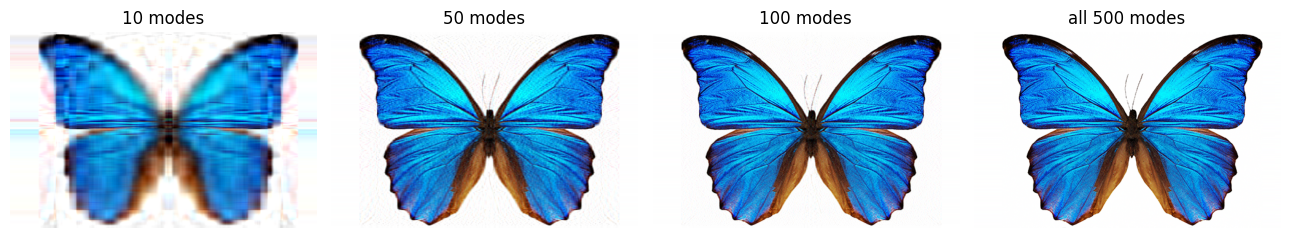

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(13,5))

for i,r_ in enumerate([10, 50, 100, 500]):
	#X_r = Ur[:,:r_] * Sr[:r_] @ VTr[:r_]
	#X_g = Ug[:,:r_] * Sg[:r_] @ VTg[:r_]
	#X_b = Ub[:,:r_] * Sb[:r_] @ VTb[:r_]

	X_x = Ux[:,:r_] * Sx[:r_] @ VTx[:r_]

	#X_ = np.stack((X_r, X_g, X_b), axis=2)
	X_ = np.stack((X_x[:320], X_x[320:640], X_x[640:]), axis=2)
	axes[i].axis('off')
	axes[i].imshow(X_)
	axes[i].set_title(f"{r_} modes")

	#S_ = Sr + Sg + Sb
	#print(np.sum(S_[:r_])/np.sum(S_))

	print(np.sum(Sx[:r_])/np.sum(Sx))

axes[3].set_title("all 500 modes")
plt.tight_layout()
	